<img src="https://github.com/AmsterdamUMC/AmsterdamUMCdb/raw/master/img/logo_amds.png" alt="Logo" style="width: 128px;"/>

# AmsterdamUMCdb - Freely Accessible ICU Database

version 1.0.1 January 2020  
Copyright &copy; 2003-2020 Amsterdam UMC - Amsterdam Medical Data Science

# <a id='processitems'></a>processitems table
The *processitems* table contains all catheters, drains, tubes, and continous non-medication processes (e.g. renal replacement therapy, hypothermia induction, etc) that patients received during their stay on the ICU. All items have an associated admissionid from the [admissions](admissions.ipynb#admissions) table.

## Fields
|Name|Type|Description|
|----|----|-----------|
|admissionid|integer|links the item with the admissionid in the [admissions](admissions.ipynb#admissions) table.|
|itemid|integer|id to identify the type of process.|
|[item](#item)|string|name of the process.|
|start|integer|start time (time of introduction) of the process, in milliseconds since the first ICU admission.| 
|stop|integer|stop time (time of removal) of the process, in milliseconds since the first ICU admission.| 
|[duration](#duration)|integer|duration of the process, i.e. the difference between start and stop times, in minutes.|

# Example Python and SQL scripts

## Imports

In [1]:
%matplotlib inline
#gets the module from the repository for use in Colab
import os.path
try:
  if not os.path.isfile('amsterdamumcdb.py'):
    !wget https://raw.githubusercontent.com/AmsterdamUMC/AmsterdamUMCdb/master/tables/amsterdamumcdb.py
finally:
    import amsterdamumcdb

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

import io
from IPython.display import display, HTML, Markdown

# Imports for accessing Datathon data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery

--2020-01-30 20:28:19--  https://raw.githubusercontent.com/AmsterdamUMC/AmsterdamUMCdb/master/tables/amsterdamumcdb.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2899 (2.8K) [text/plain]
Saving to: ‘amsterdamumcdb.py’

amsterdamumcdb.py   100%[===================>]   2.83K  --.-KB/s    in 0s      

2020-01-30 20:28:20 (59.9 MB/s) - ‘amsterdamumcdb.py’ saved [2899/2899]



# Display settings

In [0]:
#matplotlib settings for image size
#needs to be in a different cell from %matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.dpi"] = 144
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["font.size"] = 12

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = 1000

## Connection settings

In [0]:
auth.authenticate_user()

project_id='milandaticu2020'
os.environ["GOOGLE_CLOUD_PROJECT"]=project_id
os.environ["GOOGLE_CLOUD_PROJECT"]

config = {'query': 
          {'defaultDataset': {
              "datasetId": 'amsterdamumcdb_v_1_0_1', 
              "projectId": 'amsterdamumcdb-data' 
              }
           }
          }

## Overview of all fields

In [4]:
sql = """
SELECT * FROM processitems;
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df.head(10)

``` mysql

SELECT * FROM processitems;

```

,admissionid,itemid,item,start,stop,duration
0,830,16910,ICD,2108340000,2154120000,763
1,2224,16910,ICD,3180000,84060000,1348
2,3529,16910,ICD,14100000,2762940000,45814
3,3529,16910,ICD,2762940000,3636600000,14561
4,4099,16910,ICD,56474220000,56859000000,6413
5,4390,16910,ICD,2661120000,2924700000,4393
6,6739,16910,ICD,6120000,343800000,5628
7,6741,16910,ICD,1595280000,3458580000,31055
8,7847,16910,ICD,3000000,102600000,1660
9,8364,16910,ICD,3060000,166260000,2720


In [5]:
df.describe()

,admissionid,itemid,start,stop,duration
count,257740.000000,257740.000000,2.577400e+05,2.577400e+05,2.577400e+05
mean,11767.607151,9960.565710,4.082503e+09,4.359336e+09,2.074316e+03
std,6757.890264,1582.222832,2.383548e+10,2.385054e+10,3.723910e+05
min,0.000000,7926.000000,-3.426000e+08,-5.670000e+07,-5.455790e+07
25%,5970.000000,9328.000000,2.760000e+06,7.374000e+07,9.240000e+02
50%,11755.000000,9415.000000,9.480000e+06,1.716600e+08,1.389000e+03
75%,17608.000000,9422.000000,3.608400e+08,9.540000e+08,4.533000e+03
max,23552.000000,21188.000000,3.916624e+11,3.916687e+11,3.011310e+05


## <a id='item'></a>item

In [6]:
sql = """
SELECT item, COUNT(item) AS number_of_times, itemid
FROM processitems
GROUP BY item, itemid
ORDER BY number_of_times DESC
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df.head(10)

``` mysql

SELECT item, COUNT(item) AS number_of_times, itemid
FROM processitems
GROUP BY item, itemid
ORDER BY number_of_times DESC

```

,item,number_of_times,itemid
0,Perifeer infuus,39566,9422
1,Sonde,24185,9417
2,Arterielijn Radialis,22548,9159
3,Urine-Catheter (CAD),21390,9415
4,Beademen,18518,9328
5,Tube,15057,12634
6,Trilumen Jugularis,10600,9166
7,Thoraxdrain 1,9959,9403
8,Swan Ganz Jugularis,6677,9174
9,Wonddrain 1,5833,9399


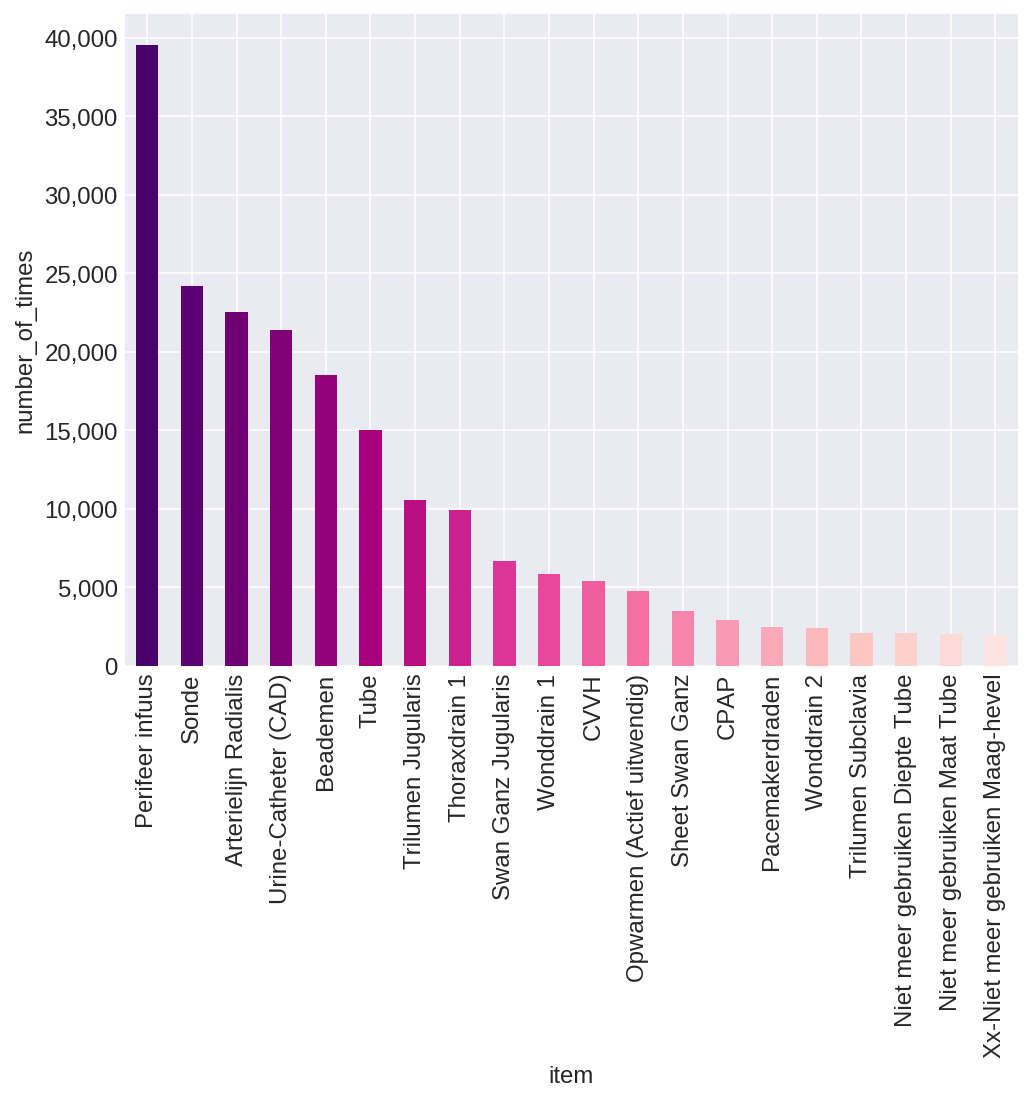

In [7]:
selection = df.head(20)
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(selection.index))
ax = selection.plot.bar(x=selection.columns[0],y=selection.columns[1], legend=False,color=cm(range(255,1,color_step)))
ax.set(ylabel=selection.columns[1])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

## <a id='duration'></a>duration

In [8]:
sql = """
SELECT *
FROM processitems
WHERE duration < 0 --stop time 'undefined'
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df.head(5)

``` mysql

SELECT *
FROM processitems
WHERE duration < 0 --stop time 'undefined'

```

,admissionid,itemid,item,start,stop,duration
0,9810,9328,Beademen,717300000,-1899,-54557891
1,9810,9422,Perifeer infuus,717300000,-1899,-54557891
2,15247,9383,X-Proces Infectie,1639860000,1639500000,-6
3,9810,9411,Suprapubis catheter,717300000,-1899,-54557891
4,1677,9159,Arterielijn Radialis,732480000,-1899,-54557903


``` mysql

SELECT *
FROM processitems
WHERE itemid IN (
    9170, --Quad lumen Jugularis
    9166, --Trilumen Jugularis
    12400, --Duo lumen Jugularis
    9162, --Dialyselijn Jugularis
    9595, --Enkel lumen Jugularis
    13422, --Trauma catheter Jugularis
    9168, --Quad lumen Femoralis
    9165, --Trilumen Femoralis
    9161, --Dialyselijn Femoralis
    13421, --Trauma catheter Femoralis
    12399, --Duo lumen Femoralis
    9594, --Enkel lumen Femoralis
    9169, --Quad lumen Subclavia
    9167, --Trilumen Subclavia
    9596, --Enkel lumen Subclavia
    9163, --Dialyselijn Subclavia
    13423 --Trauma catheter Subclavia
);

```

Text(0, 0.5, 'number of central venous catheters')

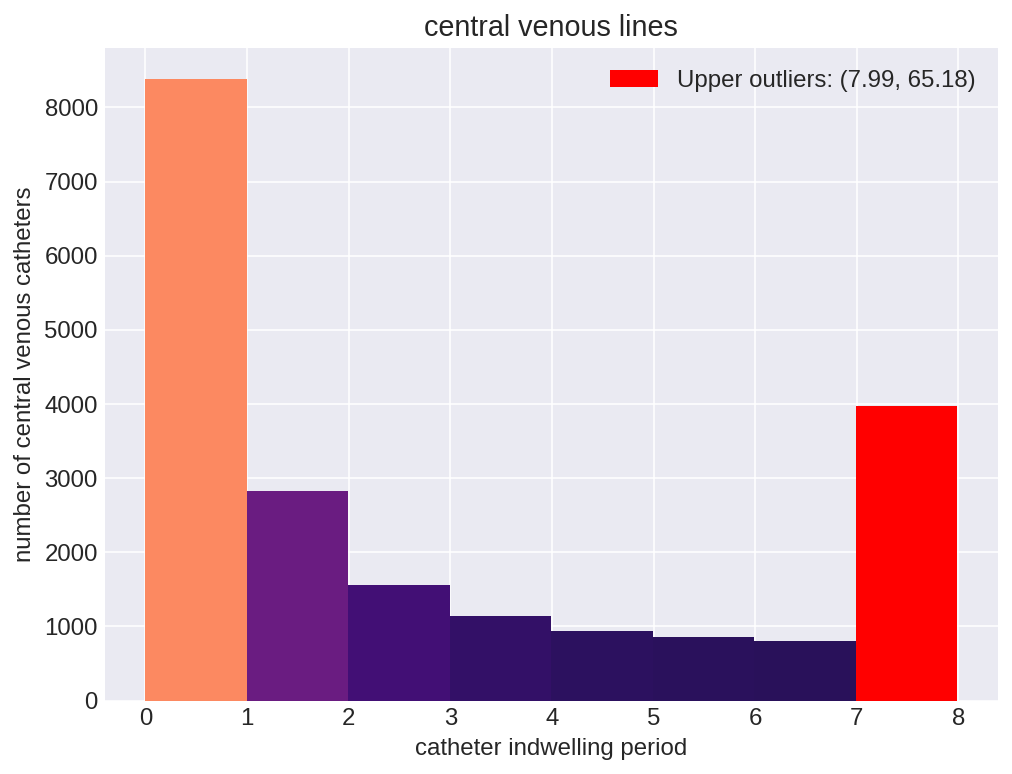

In [9]:
#duration of central venous lines
sql = """
SELECT *
FROM processitems
WHERE itemid IN (
    9170, --Quad lumen Jugularis
    9166, --Trilumen Jugularis
    12400, --Duo lumen Jugularis
    9162, --Dialyselijn Jugularis
    9595, --Enkel lumen Jugularis
    13422, --Trauma catheter Jugularis
    9168, --Quad lumen Femoralis
    9165, --Trilumen Femoralis
    9161, --Dialyselijn Femoralis
    13421, --Trauma catheter Femoralis
    12399, --Duo lumen Femoralis
    9594, --Enkel lumen Femoralis
    9169, --Quad lumen Subclavia
    9167, --Trilumen Subclavia
    9596, --Enkel lumen Subclavia
    9163, --Dialyselijn Subclavia
    13423 --Trauma catheter Subclavia
);
"""

display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df.head(20)

#plot the data
data = df[df['duration'] > 0]['duration']/(24*60)
fig = amsterdamumcdb.outliers_histogram(data, bins=8)
fig.title('central venous lines')
fig.xlabel('catheter indwelling period')
fig.ylabel('number of central venous catheters')